In [1]:
import glob
import skimage
import matplotlib.pyplot as plt
import numpy as np
import cv2

def detect_leaf(img):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    # find the brown color
    # mask_brown = cv2.inRange(hsv, (8, 60, 20), (30, 255, 200))
    # find the yellow and green color in the leaf
    mask_yellow_green = cv2.inRange(hsv, (40, 39, 64), (86, 255, 255))
    # mask_green = cv2.inRange(hsv, (55, 100, 100), (80, 255, 255))
    # find any of the three colors(green or brown or yellow) in the image
    # mask = cv2.bitwise_or(mask_yellow_green, mask_brown)
    mask = mask_yellow_green
    # Bitwise-AND mask and original image
    res = cv2.bitwise_and(img, img, mask=mask)
    return res


In [2]:
# take images that are almost squared
files = glob.glob("./data/train/*.jpg")
images = []

for f in files:
    label = "dog"
    if "cat" in f:
        label = "cat"
    images.append((skimage.io.imread(f), label, f.split("/")[-1]))

squared = []
for im in images:
    if abs(im[0].shape[0] / im[0].shape[1] - 1) < 0.2 and min(im[0].shape[:2])>200:
        squared.append(im)

for i,im in enumerate(squared):
    squared[i] = (skimage.transform.resize(im[0], (256,256)), im[1:])
n_cat=1
n_dog=1
for im in squared:
    if im[1] == "cat":
        skimage.io.imsave(f"./datasets/pets/cat_{n_cat}.jpg", (im[0]*255).astype(np.uint8))
        n_cat += 1
    else:
        skimage.io.imsave(f"./datasets/pets/dog_{n_dog}.jpg", (im[0]*255).astype(np.uint8))
        n_dog += 1


In [2]:
files = glob.glob("./datasets/pets/*.jpg")
images = []

for f in files:
    label = "dog"
    if "cat" in f:
        label = "cat"
    images.append((skimage.io.imread(f), label))


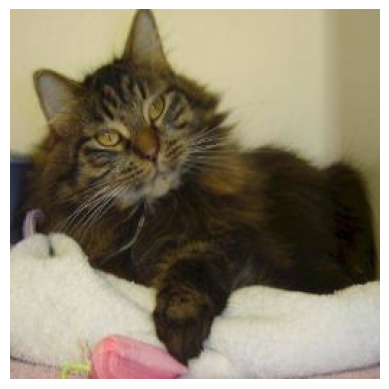

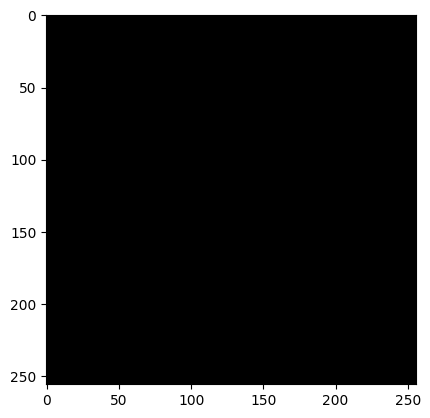

In [4]:
plt.axis("off")
plt.imshow(images[100][0])
plt.show()
plt.imshow(detect_leaf(images[100][0][:,:,::-1])[:,:,::-1])

In [5]:
greens = []
for im in images:
    masked = detect_leaf(im[0][:,:,::-1])[:,:,::-1]
    # zero_ratio = np.sum(masked<1).sum()/masked.shape[0]/masked.shape[1]
    unmask_ratio = np.mean(np.max(masked>1,-1))
    # greens.append(masked.mean()/im.mean()*zero_ratio)
    greens.append(unmask_ratio)

In [6]:
sorter = np.argsort(greens)

In [7]:
greens[sorter[-1]]

0.853485107421875

In [8]:
labels = [(i,images[i][1]) for i in sorter]
cats = []
dogs = []
for l in labels:
    if l[1] == "cat":
        cats.append(l)

for l in labels[::-1]:
    if l[1] == "dog":
        dogs.append(l)


In [9]:
import collections
collections.Counter([l[1] for l in labels[:2000]])

Counter({'dog': 1300, 'cat': 700})

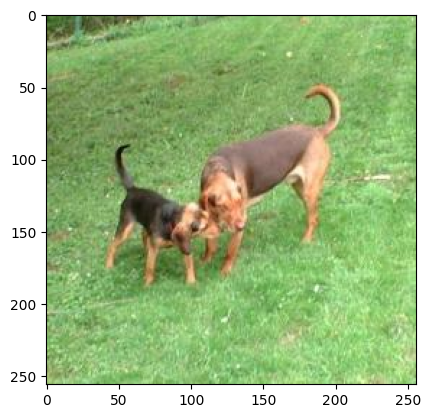

In [10]:
plt.imshow(images[dogs[0][0]][0])


In [11]:
idx = np.random.choice(range(1000), 6, replace=False)

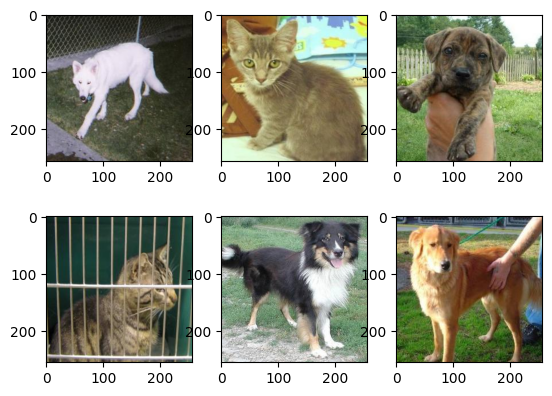

In [12]:
fig, axs = plt.subplots(2,3)
for i in range(2):
    for j in range(3):
        axs[i,j].imshow(images[dogs[idx[i*3+j]][0]][0])


In [57]:
np.array(greens)[sorter]

array([0.33546348, 0.3910849 , 0.49083014, ..., 1.33301334, 1.34956296,
       1.70763466])

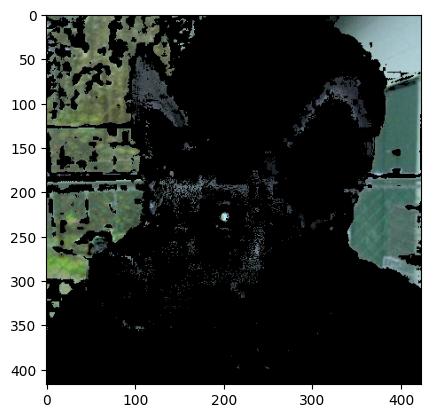

In [65]:
plt.imshow(detect_leaf(squared[sorter[-1000]][:, :, ::-1][:, :, ::-1]))

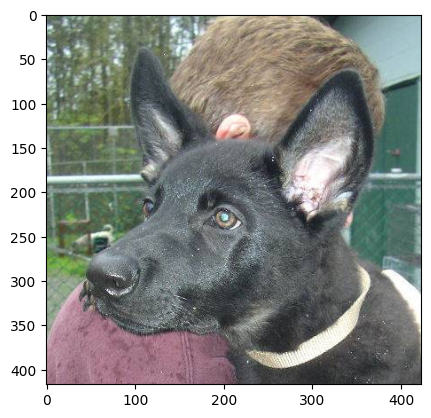

In [66]:
plt.imshow(squared[sorter[-1000]])


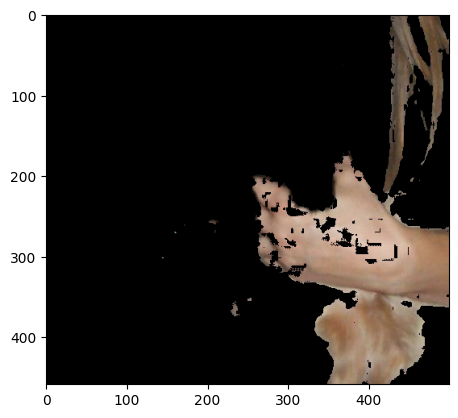

In [98]:
plt.imshow(detect_leaf(squared[sorter[-1000]][:,:,::-1])[:,:,::-1])

In [143]:
shapes = [im[0].shape for im in squared]

(array([  25.,  105.,  245.,  402.,  508.,  581.,  640.,  557.,  915.,
        1986.]),
 array([ 49. ,  94.1, 139.2, 184.3, 229.4, 274.5, 319.6, 364.7, 409.8,
        454.9, 500. ]),
 <BarContainer object of 10 artists>)

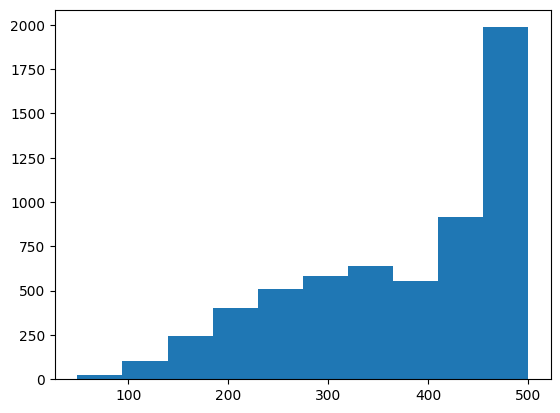

In [151]:
plt.hist(np.array(shapes)[:,0])

In [ ]:
plt.